# HOUSING DATA

This data consists of 545 housing units in india. The objective of this project is to build a predictive model to estimate housing prices based on various features such as house area, number of bedrooms, furnished status, closeness to main road, parking slot, etc. 



In [548]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [549]:
#Reading Data
housing = pd.read_csv(r'C:\Users\Montran CEO\Desktop\400 Project Trial\Housing.csv')

In [550]:
housing.shape

(545, 13)

In [551]:
housing.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [552]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [553]:
#Renaming columns
housing.rename(columns = {"price": "price ($)", "area":"area(m2)", "hotwaterheating":"heating_system",
                     "prefarea":"preferred_area", "furnishingstatus":"furnishing_status",
                     "parking": "parking_slot"}, inplace=True)

In [554]:
housing.head()

price ($)  area(m2)  bedrooms  bathrooms  stories mainroad guestroom  \
0   13300000      7420         4          2        3      yes        no   
1   12250000      8960         4          4        4      yes        no   
2   12250000      9960         3          2        2      yes        no   
3   12215000      7500         4          2        2      yes        no   
4   11410000      7420         4          1        2      yes       yes   

  basement heating_system airconditioning  parking_slot preferred_area  \
0       no             no             yes             2            yes   
1       no             no             yes             3             no   
2      yes             no              no             2            yes   
3      yes             no             yes             3            yes   
4      yes             no             yes             2             no   

  furnishing_status  
0         furnished  
1         furnished  
2    semi-furnished  
3         furnished  
4         furnished

In [555]:
#Changing Data types of price and area to float
housing['price ($)'] = housing['price ($)'].astype(int)
housing['area(m2)'] = housing['area(m2)'].astype(int)


In [556]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   price ($)          545 non-null    int32 
 1   area(m2)           545 non-null    int32 
 2   bedrooms           545 non-null    int64 
 3   bathrooms          545 non-null    int64 
 4   stories            545 non-null    int64 
 5   mainroad           545 non-null    object
 6   guestroom          545 non-null    object
 7   basement           545 non-null    object
 8   heating_system     545 non-null    object
 9   airconditioning    545 non-null    object
 10  parking_slot       545 non-null    int64 
 11  preferred_area     545 non-null    object
 12  furnishing_status  545 non-null    object
dtypes: int32(2), int64(4), object(7)
memory usage: 51.2+ KB


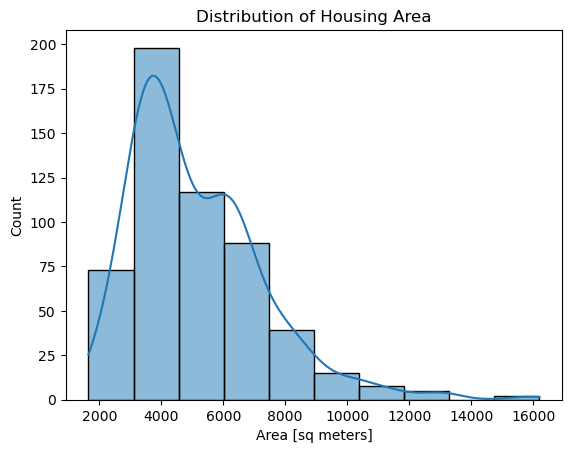

In [557]:
#Distribution of Apartment Area

sns.histplot(housing['area(m2)'], kde=True, bins=10)
plt.title('Distribution of Housing Area')
plt.xlabel('Area [sq meters]')
plt.show()

#### The plot above shows the distribution of Housing Area

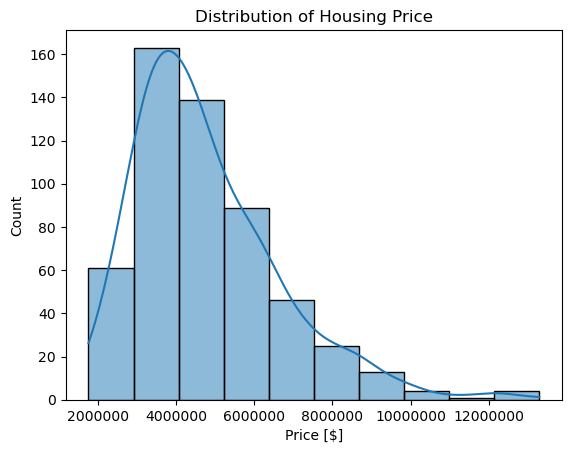

In [558]:
#Distribution of Housing Price
sns.histplot(housing['price ($)'], kde=True, bins=10)
plt.title('Distribution of Housing Price')
plt.xlabel('Price [$]')
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.show()


#### The plot above shows the distribution of Housing Price

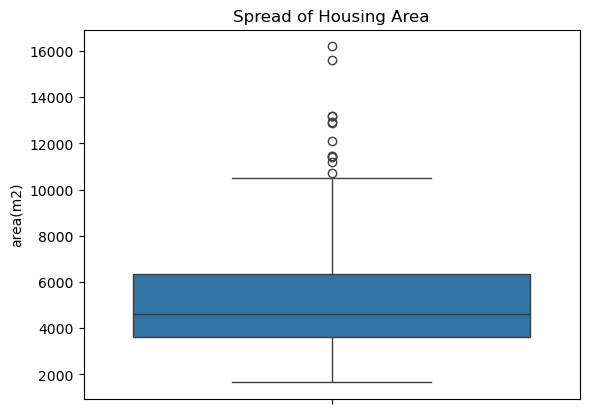

In [559]:
sns.boxplot(housing['area(m2)'])
plt.title('Spread of Housing Area')
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.show()

#### The boxplot above shows the spread of area of the housing units

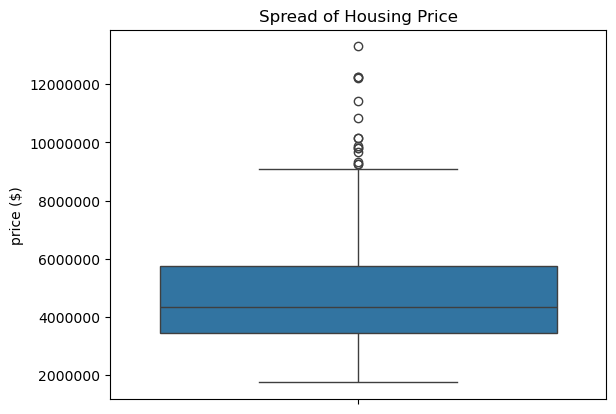

In [560]:
sns.boxplot(housing['price ($)'])
plt.title('Spread of Housing Price')
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.show()

#### The boxplot above shows the spread of price of the housing units

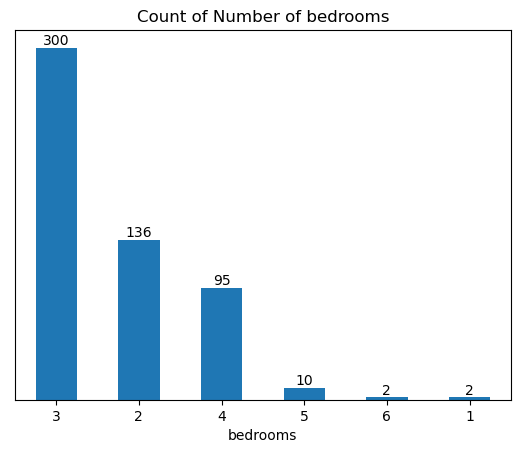

In [561]:
housing['bedrooms'].value_counts().plot(kind='bar', title = 'Count of Number of bedrooms', rot =0)
plt.xlabel('bedrooms')

#Removing the y-axis
plt.gca().yaxis.set_visible(False)

#Data Labels
for index, value in enumerate(housing['bedrooms'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

#### The plot above illustrates the distribution of houses by the number of bedrooms. Three-bedroom units are the most common, followed by two-bedroom, four-bedroom, five-bedroom, six-bedroom, and one-bedroom units.

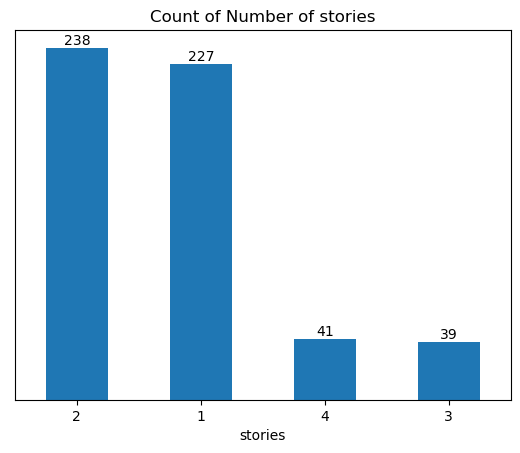

In [562]:
housing['stories'].value_counts().plot(kind='bar', title = 'Count of Number of stories', rot =0)
plt.xlabel('stories')

#Removing the y-axis
plt.gca().yaxis.set_visible(False)

#Data Labels
for index, value in enumerate(housing['stories'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

#### The plot above illustrates the distribution of houses by the number of stories. Two-story buildings are the most common, followed by one-story, four-story, and three-story buildings.

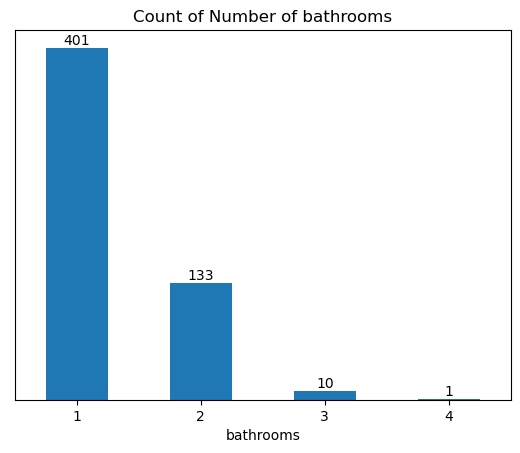

In [563]:
housing['bathrooms'].value_counts().plot(kind='bar', title = 'Count of Number of bathrooms', rot =0)
plt.xlabel('bathrooms')

#Removing the y-axis
plt.gca().yaxis.set_visible(False)

#Data Labels
for index, value in enumerate(housing['bathrooms'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

#### The plot above depicts the distribution of houses based on the number of bathrooms. Houses with one bathroom are the most common, followed by those with two bathrooms, three bathrooms, and four bathrooms.

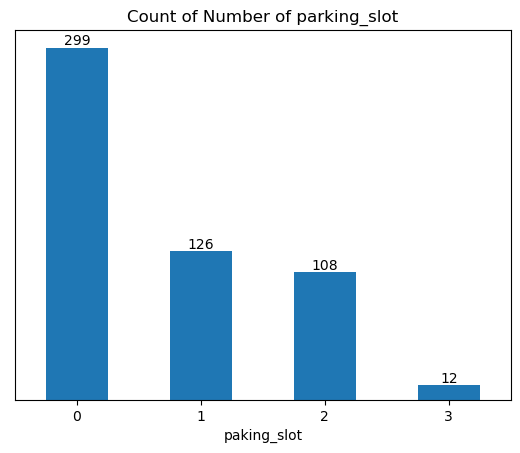

In [564]:
housing['parking_slot'].value_counts().plot(kind='bar', title = 'Count of Number of parking_slot', rot =0)
plt.xlabel('paking_slot')

#Removing the y-axis
plt.gca().yaxis.set_visible(False)

#Data Labels
for index, value in enumerate(housing['parking_slot'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')


#### The plot above illustrates the distribution of houses based on the number of parking slots. Houses without parking slots are the most common, followed by those with one parking slot, two parking slots, and three parking slots.

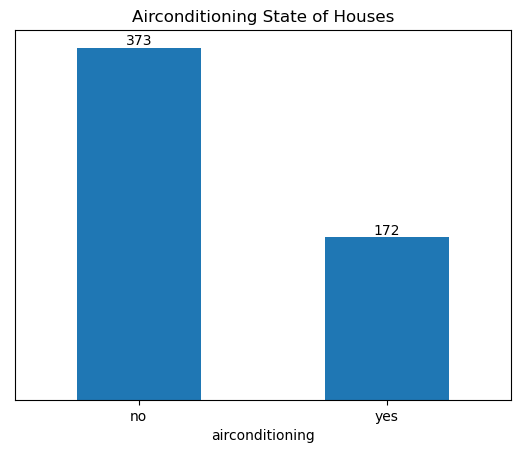

In [565]:
housing['airconditioning'].value_counts().plot(kind='bar', title = 'Airconditioning State of Houses', rot =0)
plt.xlabel('airconditioning')

#Removing the y-axis
plt.gca().yaxis.set_visible(False)

# Get the values and the positions of the bars
for index, value in enumerate(housing['airconditioning'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')


#### The plot above shows the count of houses with an air conditioning system. It indicates that 373 houses do not have air conditioning, while 172 houses do.

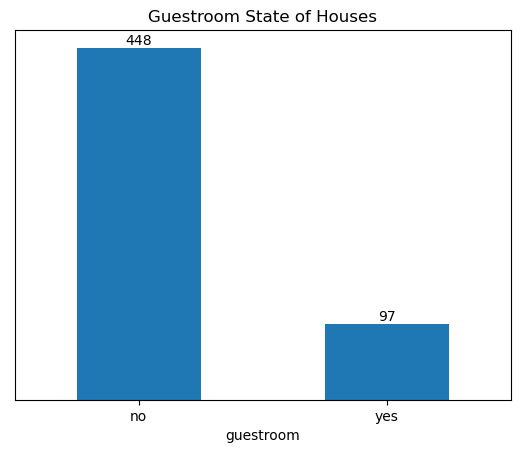

In [566]:
housing['guestroom'].value_counts().plot(kind='bar', title = 'Guestroom State of Houses', rot =0)
plt.xlabel('guestroom')

#Removing the y-axis
plt.gca().yaxis.set_visible(False)

# Get the values and the positions of the bars
for index, value in enumerate(housing['guestroom'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

#### The plot above displays the count of houses with a guest room. It reveals that out of the total, 448 houses do not have a guest room, whereas 97 houses do have one.

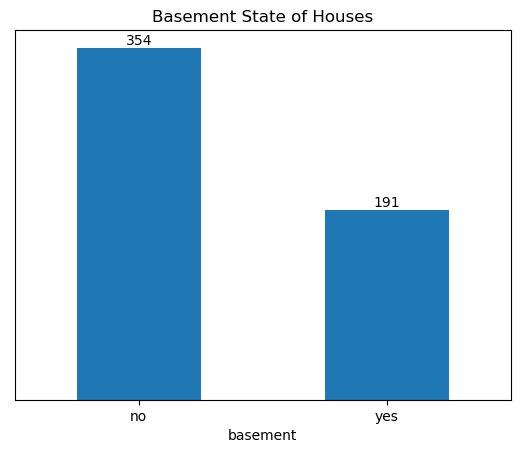

In [567]:
housing['basement'].value_counts().plot(kind='bar', title = 'Basement State of Houses', rot =0)
plt.xlabel('basement')

#Removing the y-axis
plt.gca().yaxis.set_visible(False)

# Get the values and the positions of the bars
for index, value in enumerate(housing['basement'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

#### The plot above illustrates the count of houses with a basement. It shows that out of the total, 354 houses do not have a basement, while 191 houses do.

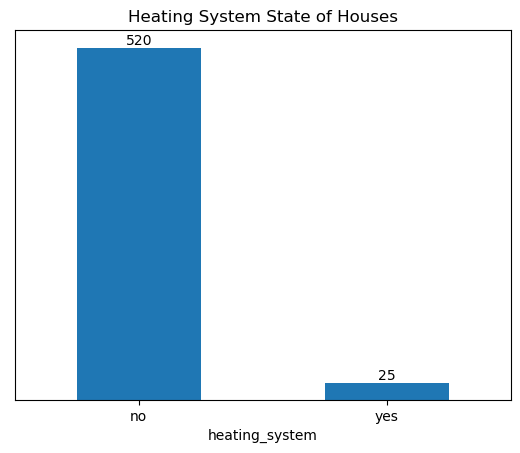

In [568]:
housing['heating_system'].value_counts().plot(kind='bar', title = 'Heating System State of Houses', rot =0)
plt.xlabel('heating_system')

#Removing the y-axis
plt.gca().yaxis.set_visible(False)

# Get the values and the positions of the bars
for index, value in enumerate(housing['heating_system'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

#### The plot above illustrates the count of houses with a heating system. Out of a total of 545 houses, 520 do not have a heating system, while 25 do.

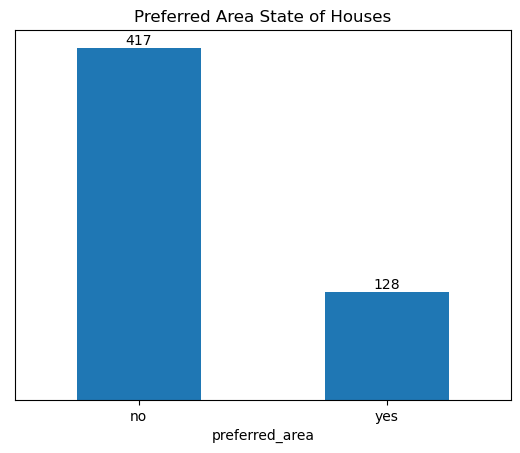

In [569]:
housing['preferred_area'].value_counts().plot(kind='bar', title = 'Preferred Area State of Houses', rot =0)
plt.xlabel('preferred_area')

#Removing the y-axis
plt.gca().yaxis.set_visible(False)

# Get the values and the positions of the bars
for index, value in enumerate(housing['preferred_area'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

#### The plot above illustrates the count of houses with a preferred area. Out of a total of 545 houses, 417 houses do not have a preferred area, while 128 houses do.

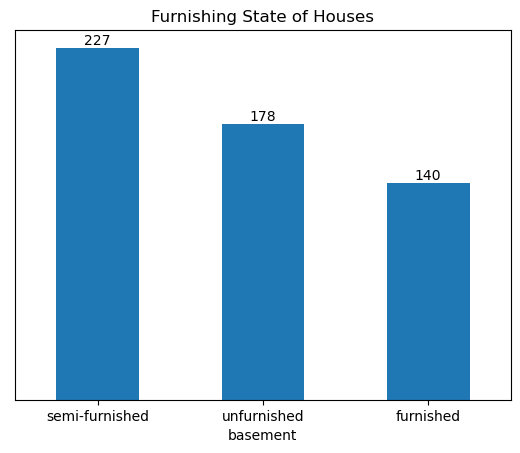

In [570]:
housing['furnishing_status'].value_counts().plot(kind='bar', title = 'Furnishing State of Houses', rot =0)
plt.xlabel('basement')

#Removing the y-axis
plt.gca().yaxis.set_visible(False)

# Get the values and the positions of the bars
for index, value in enumerate(housing['furnishing_status'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

#### The plot above illustrates the count of houses by their furnishing status. Out of a total of 545 houses, 227 are semi-furnished, 178 have an unfurnished basement, and 140 are fully furnished.

In [571]:
#Changing categorical data to numeric data

label_encoder_guestroom = LabelEncoder()
label_encoder_basement = LabelEncoder()
label_encoder_heating_system = LabelEncoder()
label_encoder_airconditioning = LabelEncoder()
label_encoder_mainroad = LabelEncoder()
label_encoder_preferred_area = LabelEncoder()
label_encoder_furnishing_status = LabelEncoder()



housing['guestroom'] = label_encoder_guestroom.fit_transform(housing['guestroom'])
housing['basement'] = label_encoder_basement.fit_transform(housing['basement'])
housing['heating_system'] = label_encoder_heating_system.fit_transform(housing['heating_system'])
housing['airconditioning'] = label_encoder_airconditioning.fit_transform(housing['airconditioning'])
housing['mainroad'] = label_encoder_mainroad.fit_transform(housing['mainroad'])
housing['preferred_area'] = label_encoder_preferred_area.fit_transform(housing['preferred_area'])
housing['furnishing_status'] = label_encoder_furnishing_status.fit_transform(housing['furnishing_status'])



In [572]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   price ($)          545 non-null    int32
 1   area(m2)           545 non-null    int32
 2   bedrooms           545 non-null    int64
 3   bathrooms          545 non-null    int64
 4   stories            545 non-null    int64
 5   mainroad           545 non-null    int32
 6   guestroom          545 non-null    int32
 7   basement           545 non-null    int32
 8   heating_system     545 non-null    int32
 9   airconditioning    545 non-null    int32
 10  parking_slot       545 non-null    int64
 11  preferred_area     545 non-null    int32
 12  furnishing_status  545 non-null    int32
dtypes: int32(9), int64(4)
memory usage: 36.3 KB


In [573]:
housing.head()

price ($)  area(m2)  bedrooms  bathrooms  stories  mainroad  guestroom  \
0   13300000      7420         4          2        3         1          0   
1   12250000      8960         4          4        4         1          0   
2   12250000      9960         3          2        2         1          0   
3   12215000      7500         4          2        2         1          0   
4   11410000      7420         4          1        2         1          1   

   basement  heating_system  airconditioning  parking_slot  preferred_area  \
0         0               0                1             2               1   
1         0               0                1             3               0   
2         1               0                0             2               1   
3         1               0                1             3               1   
4         1               0                1             2               0   

   furnishing_status  
0                  0  
1                  0  
2                  1  
3                  0  
4                  0

In [574]:
features = [ "area(m2)", "bedrooms", "bathrooms", "stories","basement","parking_slot","mainroad", "guestroom",
            "parking_slot", "furnishing_status", "preferred_area", "heating_system", "airconditioning"]

In [575]:
target = ["price ($)"]

In [576]:
#Creating a Feature Matrix X and target Y

X = housing[features]
y = housing['price ($)']
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (545, 13)
y shape: (545,)


In [577]:
#Dividing dataset into training and test sets using a randomized split. Test set is 20% of the data.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (436, 13)
y_train shape: (436,)
X_test shape: (109, 13)
y_test shape: (109,)


In [578]:
#Scaling data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Using Linear Regression

In [579]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [580]:
#Using Linear Regression

lr_normal_score_train = lr_model.score(X_train, y_train)
lr_normal_score_test = lr_model.score(X_test, y_test)
y_pred = lr_model.predict(X_test)
mae_lr_normal = mean_absolute_error(y_test, y_pred)
rmse_lr_normal = np.sqrt(mean_squared_error(y_test, y_pred))

print('Train :', lr_normal_score_train)
print('Test :', lr_normal_score_test)
print('Mean Absolute Error :', mae_lr_normal)
print('Root Mean Square Error :', rmse_lr_normal)

Train : 0.6854429472843788
Test : 0.6494754192267811
Mean Absolute Error : 979679.6912959905
Root Mean Square Error : 1331071.4167895091


### Using Random Forest Regressor

In [581]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [582]:
#Using Random Forest Regressor

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 1910530033209.8699
Mean Absolute Error: 1007334.7752293578
R-squared: 0.6220192934135558


In [583]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)


GradientBoostingRegressor()

In [584]:
#Using Gradient Boosting Regressor

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 1695741390478.3652
Mean Absolute Error: 963662.4993107818
R-squared: 0.6645132409229793


#### Of the models trained, the optimum model is Linear Regression